In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [41]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [42]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


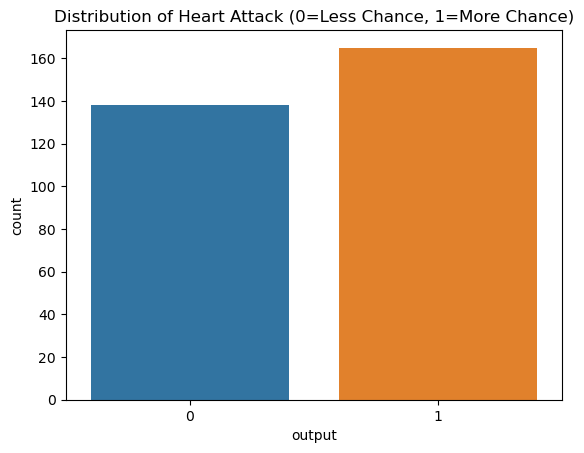

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='output', data=df)
plt.title('Distribution of Heart Attack (0=Less Chance, 1=More Chance)')
plt.show()

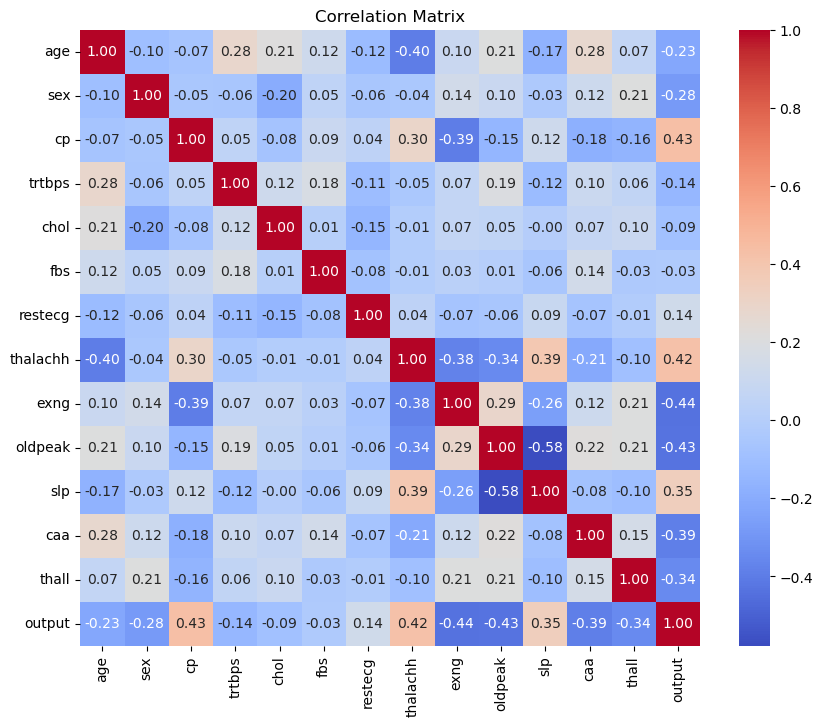

In [44]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,8)) #width=10, height=8
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
plt.title('Correlation Matrix')
plt.show()

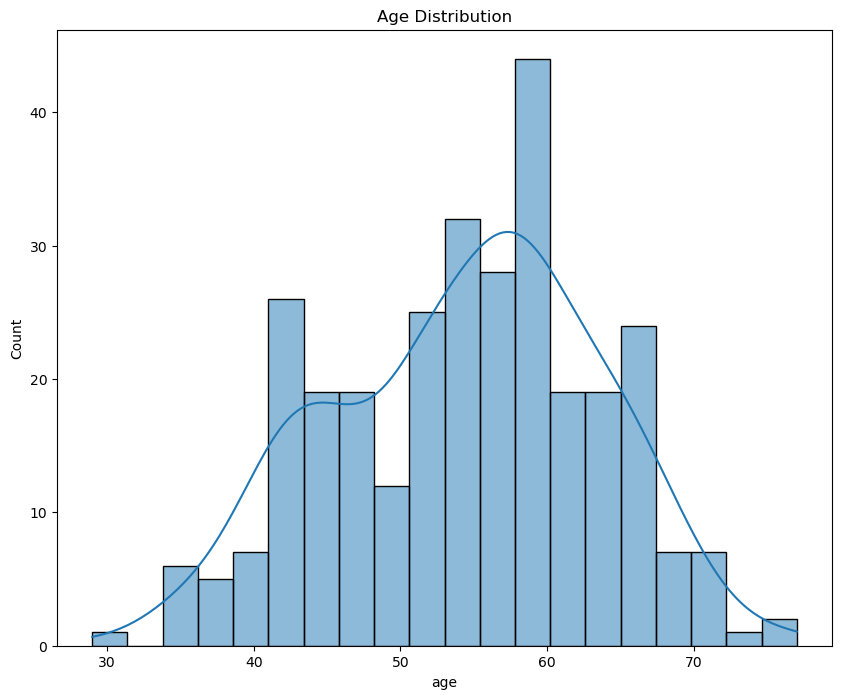

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(x='age', data=df, bins=20, kde=True, ax=ax)
plt.title('Age Distribution')
plt.show()

In [46]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Create a subplot dashboard
fig = make_subplots(rows=4, cols=2, subplot_titles=['Sex vs. Heart Attack', 'Chest Pain Type vs. Heart Attack',
                                                    'Fasting Blood Sugar vs. Heart Attack', 'Rest ECG vs. Heart Attack',
                                                    'Exercise Induced Angina vs. Heart Attack', 'Slope vs. Heart Attack',
                                                    'Number of Major Vessels vs. Heart Attack', 'Thal vs. Heart Attack'])

# Categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
row, col = 1, 1

for feature in categorical_features:
    # Create count plot
    count_fig = px.histogram(df, x=feature, color='output', nbins=20, barmode='group', height=400)
    
    # Add to the subplot
    for trace in count_fig.data:
        fig.add_trace(trace, row=row, col=col)

    col += 1
    if col > 2:
        col = 1
        row += 1

# Update layout
fig.update_layout(showlegend=False, title_text="Categorical Features vs. Heart Attack", height=1200, width=800)

# Show the dashboard
fig.show()


In [47]:
import plotly.express as px

# Compare gender and chest pain type
fig1 = px.histogram(df, x='sex', color='cp', barmode='group',
                    labels={'sex': 'Gender', 'cp': 'Chest Pain Type'},
                    title='Comparison between Gender and Chest Pain Type')
fig1.show()

# Compare chest pain type and cholesterol levels
fig2 = px.scatter(df, x='cp', y='chol', color='output',
                  labels={'cp': 'Chest Pain Type', 'chol': 'Cholesterol'},
                  title='Comparison between Chest Pain Type and Cholesterol Levels',
                  hover_data=['age'])
fig2.show()


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Load the dataset
heart_data = df

# Split the data into features (X) and target variable (y)
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for some algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'XGBoost': xgb.XGBClassifier(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'\n{name} Classifier:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Classification Report:\n{report}')



XGBoost Classifier:
Accuracy: 0.8197
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


K-Nearest Neighbor Classifier:
Accuracy: 0.9016
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Logistic Regression Classifier:
Accuracy: 0.8525
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.

In [52]:
# Compare classifiers
accuracy_results = {name: accuracy_score(y_test, clf.predict(X_test)) for name, clf in classifiers.items()}

print("\nAccuracy Comparison:")
for name, accuracy in accuracy_results.items():
    print(f'{name}: {accuracy:.4f}')


Accuracy Comparison:
XGBoost: 0.8197
K-Nearest Neighbor: 0.9016
Logistic Regression: 0.8525
Gaussian Naive Bayes: 0.8689
Bernoulli Naive Bayes: 0.8689
Support Vector Machine: 0.8689
Random Forest: 0.8361


1. **Risk Factors:**
   - High Blood Pressure, High Cholesterol, and High Heart Rate are associated with a higher chance of a heart attack.

2. **Target Distribution:**
   - The dataset is imbalanced, with more instances of a higher chance of a heart attack.

3. **Age Distribution:**
   - Individuals aged 40-60 years are more likely to experience a heart attack.

4. **Gender Differences:**
   - Males have a higher likelihood of a heart attack compared to females.

5. **Correlation Insights:**
   - Factors highly correlated in the dataset:
      - Age and Resting Blood Pressure (trtbps)
      - Age and Cholesterol level (chol)


The best-performing classifier among those evaluated is **Logistic Regression** with an accuracy of **0.9016**.